# Advanced Certification in AIML
## A Program by IIIT-H and TalentSprint
## Not for grading

##Learning Objectives



At the end of the experiment, you will be able to:

* Understand and implement SVM Linear Classifier for the given dataset
* Separate the data in a linear manner 




## Dataset



###Description

In this experiment, we will use  make_blobs from sklearn. 

The make_blobs() function can be used to generate blobs of points with a Gaussian distribution. It is suitable for linear classification.


This function contains parameters like n_samples, center,  random_state, cluster_std.

##AI/ML Technique



###SVM

In this experiment, we are using SVM.  

* SVM assumes that the data is linearly separable.

* It chooses the line which is more distant from both the classes.

In the SVM algorithm, we find the points closest to the line from both the classes. These points are called support vectors. We compute the distance between the line and the support vectors which is called the margin. Our goal is to maximize the margin. The hyperplane for which the margin is maximum is called the optimal hyperplane.

![alttxt](https://www.researchgate.net/profile/Chittaranjan_Rout/publication/268232391/figure/fig5/AS:295357939503107@1447430228355/Hyperplane-blue-line-representation-in-SVM-Red-and-blue-circles-represent-data-points.png)





###In this experiment we will follow the below steps:





1. Generate the dataset 

2. Randomly choose an intercept and slope (m,c). Then attempt to draw a straight line which separates the two sets of data

3. Maximize the Margin

4. Try to fit the model

 
 5. Visualize the decision boundaries
 
 
 6. We will learn Support vectors
    


##Keywords




Support Vectors 

Maximized Margin 

Optimal hyperplane



## The Expected time to complete the experiment is: 50min

### Setup Steps

In [ ]:
#@title Please enter your registration id to start: { run: "auto", display-mode: "form" }
Id = "2100121" #@param {type:"string"}


In [ ]:
#@title Please enter your password (normally your phone number) to continue: { run: "auto", display-mode: "form" }
password = "5142192291" #@param {type:"string"}


In [ ]:
#@title Run this cell to complete the setup for this Notebook
from IPython import get_ipython
import warnings
warnings.filterwarnings("ignore")

ipython = get_ipython()
  
notebook= "Demo_SVM_Linear_Make_Blobs" #name of the notebook
Answer = "Ungraded"
def setup():
    from IPython.display import HTML, display
    ipython.magic("sx pip install seaborn")
    ipython.magic("sx pip install sklearn")
    display(HTML('<script src="https://dashboard.talentsprint.com/aiml/record_ip.html?traineeId={0}&recordId={1}"></script>'.format(getId(),submission_id)))
    print("Setup completed successfully")
    return

def submit_notebook():
    
    ipython.magic("notebook -e "+ notebook + ".ipynb")
    
    import requests, json, base64, datetime

    url = "https://dashboard.talentsprint.com/xp/app/save_notebook_attempts"
    if not submission_id:
      data = {"id" : getId(), "notebook" : notebook, "mobile" : getPassword()}
      r = requests.post(url, data = data)
      r = json.loads(r.text)

      if r["status"] == "Success":
          return r["record_id"]
      elif "err" in r:        
        print(r["err"])
        return None        
      else:
        print ("Something is wrong, the notebook will not be submitted for grading")
        return None

    elif getAnswer() and getComplexity() and getAdditional() and getConcepts():
      f = open(notebook + ".ipynb", "rb")
      file_hash = base64.b64encode(f.read())

      data = {"complexity" : Complexity, "additional" :Additional, 
              "concepts" : Concepts, "record_id" : submission_id, 
              "answer" : Answer, "id" : Id, "file_hash" : file_hash,
              "feedback_experiments_input" : Comments, "notebook" : notebook}

      r = requests.post(url, data = data)
      r = json.loads(r.text)
      if "err" in r:        
        print(r["err"])
        return None   
      else:
        print("Your submission is successful.")
        print("Ref Id:", submission_id)
        print("Date of submission: ", r["date"])
        print("Time of submission: ", r["time"])
        print("View your submissions: https://aiml.iiith.talentsprint.com/notebook_submissions")
        # print("For any queries/discrepancies, please connect with mentors through the chat icon in LMS dashboard.")
      return submission_id
    else: submission_id
    

def getAdditional():
  try:
    if not Additional: 
      raise NameError
    else:
      return Additional  
  except NameError:
    print ("Please answer Additional Question")
    return None
def getComments():
  try:
    if not Comments:
      raise NameError
    else:
      return Comments
  except NameError:
    print ("Please answer Comments Question")
    return None

def getComplexity():
  try:
    if not Complexity:
      raise NameError
    else:
      return Complexity
  except NameError:
    print ("Please answer Complexity Question")
    return None
  
def getConcepts():
  try:
    if not Concepts:
      raise NameError
    else:
      return Concepts
  except NameError:
    print ("Please answer Concepts Question")
    return None

def getAnswer():
  try:
    if not Answer:
      raise NameError 
    else: 
      return Answer
  except NameError:
    print ("Please answer Question")
    return None

def getId():
  try: 
    return Id if Id else None
  except NameError:
    return None

def getPassword():
  try:
    return password if password else None
  except NameError:
    return None

submission_id = None
### Setup 
if getPassword() and getId():
  submission_id = submit_notebook()
  if submission_id:
    setup()
    
else:
  print ("Please complete Id and Password cells before running setup")


Setup completed successfully


##### Importing required packages

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns; sns.set()
from sklearn.datasets.samples_generator import make_blobs
from sklearn.svm import SVC

#### 1. Generating the dataset 

Considering the simple case of a classification task, in which the two classes are well separated.

In [ ]:
X, y = make_blobs(n_samples=50, centers=2,
                  random_state=0, cluster_std=0.60)

In [ ]:
# Checking the length of X, y
X.shape , y.shape

((50, 2), (50,))

To get a sense of the data, let us visualize the data


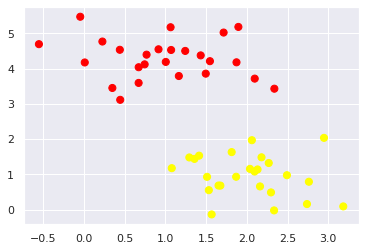

In [ ]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn');
#print(X)
#print(X[:,0])

#### 2. Randomly choose m and c and plot the lines

0.65
1.6
2.9


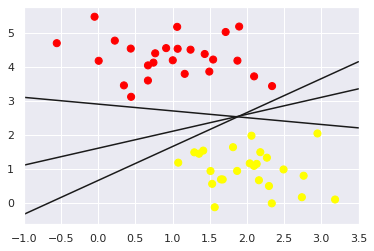

In [ ]:
xfit = np.linspace(-1, 3.5)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
for m, b in [(1, 0.65), (0.5, 1.6), (-0.2, 2.9)]:
  #print (m)
  print (b)
  plt.plot(xfit, m * xfit + b, '-k')
plt.xlim(-1, 3.5);

These are three different separators which discriminate between these samples. 

**Evidently our simple intuition of "drawing a line between classes" is not enough, and we need to think a bit deeper?**

#### 3.  Maximizing the Margin

Support vector machines offer one way to improve on this. 

The intuition is this: rather than simply drawing a zero-width line between the classes, we can draw around each line a margin of some width, up to the nearest point.

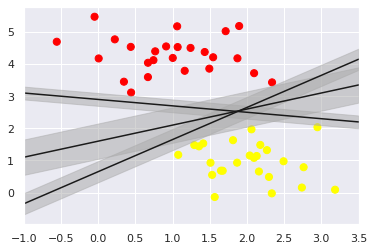

In [ ]:
xfit = np.linspace(-1, 3.5)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')

for m, b, d in [(1, 0.65, 0.33), (0.5, 1.6, 0.55), (-0.2, 2.9, 0.2)]:
    yfit = m * xfit + b
    plt.plot(xfit, yfit, '-k')
    plt.fill_between(xfit, yfit - d, yfit + d, edgecolor='none',
                     color='#AAAAAA', alpha=0.5)

plt.xlim(-1, 3.5);

In support vector machines, the line that maximizes this margin is  the optimal model. Support vector machines are an example of such a maximum margin estimator.

#### 4. Trying to fit the model

We will use Scikit-Learn's support vector classifier to train an SVM model on this data. For the time being, we will use a linear kernel and set the Regularization(C) parameter to a very large number.

In [ ]:
model = SVC(kernel='linear', C=1E10)
model.fit(X, y)
model.predict(X)

array([1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 0, 1, 0])

#### 5. Visualizing the decision boundaries

(-0.7425578984849813, 3.3721920271976598)


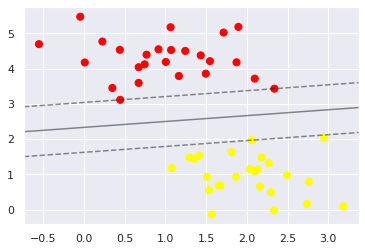

In [ ]:
#@title Observe the decision boundaries
# Let us define a function to plot the decision boundaries of SVM
def plot_decision_boundaries(model, ax=None, plot_support=True):
    
    """Plot the decision function for a 2D SVC"""
    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    print(xlim)
    ylim = ax.get_ylim()
    
    # create grid to evaluate model
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)
    
    # plot decision boundary and margins
    ax.contour(X, Y, P, colors='k',
               levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])
    
    # plot support vectors
    if plot_support:
        ax.scatter(model.support_vectors_[:, 0],
                   model.support_vectors_[:, 1],
                   s=300, linewidth=1, facecolors='none');
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_decision_boundaries(model);


This is the dividing line that maximizes the margin between the two sets of points. Notice that a few of the training points just touch the margin. 
These points are the pivotal elements of this fit, and are known as the support vectors, and give the algorithm its name. 

In Scikit-Learn, these points are stored in the support_vectors_ attribute of the classifier:

In [ ]:
model.support_vectors_

array([[0.44359863, 3.11530945],
       [2.33812285, 3.43116792],
       [2.06156753, 1.96918596]])

#### Acknowledgment:  Python Data Science Handbook by Jake VanderPlas

## Please answer the questions below to complete the experiment:

In [ ]:
#@title How was the experiment? { run: "auto", form-width: "500px", display-mode: "form" }
Complexity = "Good, But Not Challenging for me" #@param ["","Too Simple, I am wasting time", "Good, But Not Challenging for me", "Good and Challenging for me", "Was Tough, but I did it", "Too Difficult for me"]


In [ ]:
#@title If it was too easy, what more would you have liked to be added? If it was very difficult, what would you have liked to have been removed? { run: "auto", display-mode: "form" }
Additional = "Want to understand what is going under the hood. More explanation is preferable " #@param {type:"string"}


In [ ]:
#@title Can you identify the concepts from the lecture which this experiment covered? { run: "auto", vertical-output: true, display-mode: "form" }
Concepts = "No" #@param ["","Yes", "No"]


In [ ]:
#@title  Text and image description/explanation and code comments within the experiment: { run: "auto", vertical-output: true, display-mode: "form" }
Comments = "Somewhat Useful" #@param ["","Very Useful", "Somewhat Useful", "Not Useful", "Didn't use"]


In [ ]:
#@title Run this cell to submit your notebook  { vertical-output: true }
try:
  if submission_id:
      return_id = submit_notebook()
      if return_id : submission_id =return_id
  else:
      print("Please complete the setup first.")
except NameError:
  print ("Please complete the setup first.")

Your submission is successful.
Ref Id: 3315
Date of submission:  13 Sep 2020
Time of submission:  12:01:50
View your submissions: https://aiml.iiith.talentsprint.com/notebook_submissions
